Copyright 2020 Montvieux Ltd

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

In [1]:
from gym_plark.envs import plark_env_non_image_state, super_pelican_env
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

2023-05-03 16:10:04.391744: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-03 16:10:05.031463: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
env = plark_env_non_image_state.PlarkEnvNonImageState(config_file_path='/home/alexr/dev/plark/plark_ai_public/Components/plark-game/plark_game/game_config/10x10/panther_easy.json',random_panther_start_position=True)



INFO:gym_plark.envs.plark_env_non_image_state:non image kwargs: {'random_panther_start_position': True, 'image_based': False}
INFO:gym_plark.envs.plark_env:plark.kwargs :{'random_panther_start_position': True, 'image_based': False, 'render_height': 250, 'render_width': 310, 'driving_agent': 'pelican'}
INFO:gym_plark.envs.plark_env:self.image_based :False
INFO:gym_plark.envs.plark_env:config filepath: /home/alexr/dev/plark/plark_ai_public/Components/plark-game/plark_game/game_config/10x10/panther_easy.json
INFO:plark_game.classes.environment:Opening config from:/home/alexr/dev/plark/plark_ai_public/Components/plark-game/plark_game/game_config/10x10/panther_easy.json
INFO:plark_game.classes.newgame:Opening agent from:/home/alexr/dev/plark/plark_ai_public/Components/plark-game/plark_game/agents/basic/PantherAgentIllegalMove.py
INFO:plark_game.classes.newgame:Opening agent from:/home/alexr/dev/plark/plark_ai_public/Components/plark-game/plark_game/agents/basic/pelicanAgent_3_buoys.py
INFO:

Initial observation: [10 10 36  5  5  0  0  1  5 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0
 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0
 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0
 31 31  0 31 31  0 31 31  0 31 31  0  5  1  1  1  0 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31]
Taking action: 1
Got obs: [10 10 36  4  6  0  0  1  5 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0
 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0
 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0
 31 31  0 31 31  0 31 31  0 31 31  0  5  1  1  1  0 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31]


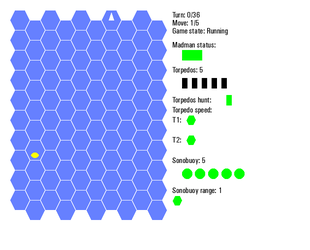

Taking action: 0
Got obs: [10 10 36  4  6  0  0  1  5 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0
 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0
 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0
 31 31  0 31 31  0 31 31  0 31 31  0  5  1  1  1  0 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31]


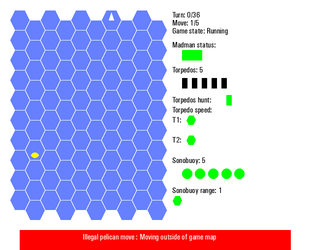

Taking action: 2
Got obs: [10 10 36  3  7  0  0  1  5 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0
 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0
 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0
 31 31  0 31 31  0 31 31  0 31 31  0  5  1  1  1  0 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31]


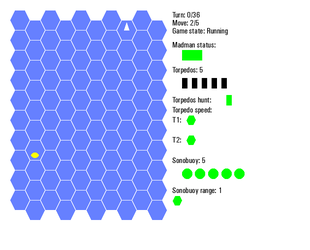

Taking action: 4
Got obs: [10 10 36  2  6  1  0  1  5 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0
 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0
 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0
 31 31  0 31 31  0 31 31  0 31 31  0  5  1  1  1  0 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31]


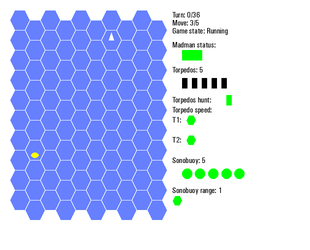

Taking action: 1
Got obs: [10 10 36  1  7  0  0  1  5 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0
 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0
 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0 31 31  0
 31 31  0 31 31  0 31 31  0 31 31  0  5  1  1  1  0 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31]


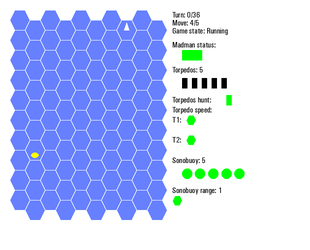

In [3]:
import random
obs, info = env.reset()
print("Initial observation: {}".format(obs))
for j in range(5):
    action = random.randrange(7)
    print("Taking action: {}".format(action))
    ob, reward, terminated, truncated, info = env.step(action)
    print("Got obs: {}".format(ob))
    display(env.render())

In [4]:
observation_space = env.observation_space
observation_space.shape[0]

139

In [5]:
obs, info = env.reset()
len(obs)

139

In [6]:
import helper
import datetime
import os
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env

env.reset()
check_env(env)
#model = helper.make_new_model("PPO", "MlpPolicy", env)
model = PPO('MlpPolicy', env)


AssertionError: Your environment must inherit from the gym.Env class cf https://github.com/openai/gym/blob/master/gym/core.py

In [ ]:
model.learn(200)


In [ ]:
video_path = '/home/alexr/dev/plark/plark_ai_public/data/test_video/'
os.makedirs(video_path, exist_ok=True)
video_path =  os.path.join(video_path, 'test_non_image_train.mp4') 
basewidth,hsize = helper.make_video(model,env,video_path)

In [ ]:
import io
import base64
from IPython.display import HTML
video = io.open(video_path, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" width="'''+str(basewidth)+'''" height="'''+str(hsize)+'''" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))